In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import time
import plotly.express as px
import plotly.graph_objs as go

In [2]:
scores=pd.read_csv('scores.csv')


In [3]:
scores.head()

number  days  gender    age  afftype  melanch  inpatient    edu  \
0  condition_1    11       2  35-39      2.0      2.0        2.0   6-10   
1  condition_2    18       2  40-44      1.0      2.0        2.0   6-10   
2  condition_3    13       1  45-49      2.0      2.0        2.0   6-10   
3  condition_4    13       2  25-29      2.0      2.0        2.0  11-15   
4  condition_5    13       2  50-54      2.0      2.0        2.0  11-15   

   marriage  work  madrs1  madrs2  
0       1.0   2.0    19.0    19.0  
1       2.0   2.0    24.0    11.0  
2       2.0   2.0    24.0    25.0  
3       1.0   1.0    20.0    16.0  
4       2.0   2.0    26.0    26.0

<AxesSubplot:xlabel='days', ylabel='count'>

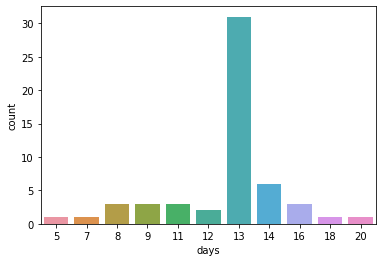

In [4]:
sns.countplot(x=scores['days'])

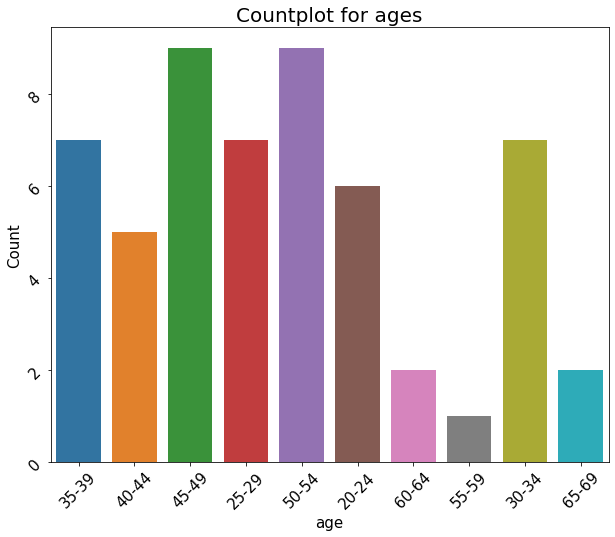

In [5]:
pl.figure(figsize=(10,8))
pl.title('Countplot for ages',fontsize=20)
sns.countplot(x=scores['age'])
pl.xticks(rotation=45,fontsize=15)
pl.xlabel('age',fontsize=15)
pl.yticks(rotation=45,fontsize=15)
pl.ylabel('Count',fontsize=15)

pl.show()

<AxesSubplot:xlabel='edu', ylabel='count'>

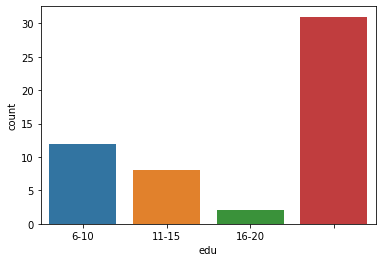

In [6]:
sns.countplot(x=scores['edu'])

In [7]:
# for i in scores.columns[1:]:
#     sns.countplot(x=scores[i])
#     pl.show()

In [8]:
scores['DeltaMADRS']=scores.madrs1-scores.madrs2

In [9]:
df=scores.copy()
df_condition=df[df['number'].str.contains('condition')].copy()
df_control=df[df['number'].str.contains('control')].copy()

In [10]:
df_condition.head()

number  days  gender    age  afftype  melanch  inpatient    edu  \
0  condition_1    11       2  35-39      2.0      2.0        2.0   6-10   
1  condition_2    18       2  40-44      1.0      2.0        2.0   6-10   
2  condition_3    13       1  45-49      2.0      2.0        2.0   6-10   
3  condition_4    13       2  25-29      2.0      2.0        2.0  11-15   
4  condition_5    13       2  50-54      2.0      2.0        2.0  11-15   

   marriage  work  madrs1  madrs2  DeltaMADRS  
0       1.0   2.0    19.0    19.0         0.0  
1       2.0   2.0    24.0    11.0        13.0  
2       2.0   2.0    24.0    25.0        -1.0  
3       1.0   1.0    20.0    16.0         4.0  
4       2.0   2.0    26.0    26.0         0.0

In [11]:
df_control.head()

number  days  gender    age  afftype  melanch  inpatient  edu  \
23  control_1     8       2  25-29      NaN      NaN        NaN  NaN   
24  control_2    20       1  30-34      NaN      NaN        NaN        
25  control_3    12       2  30-34      NaN      NaN        NaN        
26  control_4    13       1  25-29      NaN      NaN        NaN        
27  control_5    13       1  30-34      NaN      NaN        NaN        

    marriage  work  madrs1  madrs2  DeltaMADRS  
23       NaN   NaN     NaN     NaN         NaN  
24       NaN   NaN     NaN     NaN         NaN  
25       NaN   NaN     NaN     NaN         NaN  
26       NaN   NaN     NaN     NaN         NaN  
27       NaN   NaN     NaN     NaN         NaN

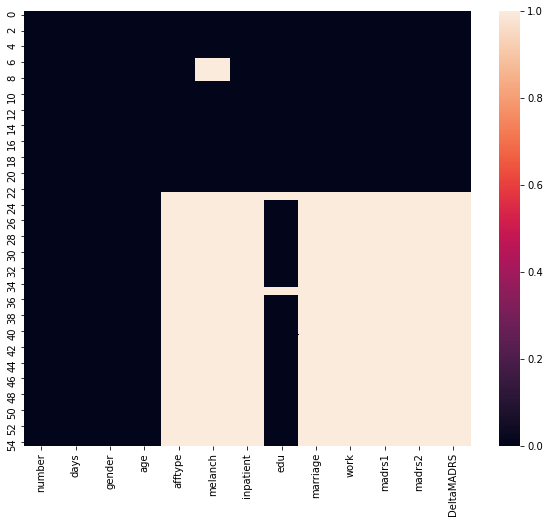

In [12]:
pl.figure(figsize=(10,8))
sns.heatmap(df.isnull())
pl.show()

In [13]:
text_missing='_MISSING_'

In [14]:
df_condition.melanch=df_condition.melanch.fillna(text_missing)
df_condition.melanch=df_condition.melanch.astype('category')
df_condition.melanch=df_condition.melanch.cat.rename_categories({
    -1:'text_missing',
    1.0:'1',
    2.0:'2'
})

<AxesSubplot:xlabel='melanch', ylabel='count'>

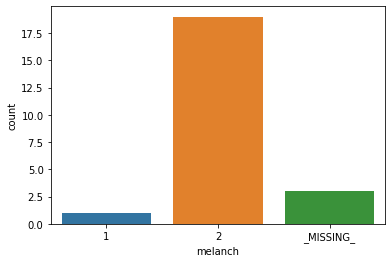

In [15]:
sns.countplot(x=df_condition['melanch'])

In [16]:
df_condition.age=df_condition.age.astype('category')
df_condition.gender=df_condition.gender.astype('category')


In [17]:
df_condition.afftype=df_condition.afftype.astype(int).astype('category')
df_condition.inpatient=df_condition.inpatient.astype(int).astype('category')
df_condition.marriage=df_condition.marriage.astype('int').astype('category')
df_condition.work=df_condition.work.astype(int).astype('category')

In [18]:
df_condition.edu=df_condition.edu.astype('category')
df_condition.edu=df_condition.edu.cat.rename_categories({' ':text_missing})

In [19]:
df_condition.head()

number  days gender    age afftype melanch inpatient    edu marriage  \
0  condition_1    11      2  35-39       2       2         2   6-10        1   
1  condition_2    18      2  40-44       1       2         2   6-10        2   
2  condition_3    13      1  45-49       2       2         2   6-10        2   
3  condition_4    13      2  25-29       2       2         2  11-15        1   
4  condition_5    13      2  50-54       2       2         2  11-15        2   

  work  madrs1  madrs2  DeltaMADRS  
0    2    19.0    19.0         0.0  
1    2    24.0    11.0        13.0  
2    2    24.0    25.0        -1.0  
3    1    20.0    16.0         4.0  
4    2    26.0    26.0         0.0

In [20]:
features_num = ['days','madrs1','madrs2','DeltaMADRS']
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

In [21]:
df_condition[features_num].describe()

days     madrs1     madrs2  DeltaMADRS
count  23.000000  23.000000  23.000000   23.000000
mean   12.652174  22.739130  20.000000    2.739130
std     2.773391   4.797892   4.729021    3.968253
min     5.000000  13.000000  11.000000   -4.000000
25%    12.500000  18.500000  16.000000    0.000000
50%    13.000000  24.000000  21.000000    3.000000
75%    14.000000  26.000000  24.500000    5.000000
max    18.000000  29.000000  28.000000   13.000000

In [22]:
df_condition[features_cat].describe()

age  gender  afftype melanch  inpatient   edu  marriage  work
count      23      23       23      23         23    23        23    23
unique     10       2        3       3          2     4         2     2
top     45-49       2        2       2          2  6-10         2     2
freq        5      13       15      19         18    12        12    20

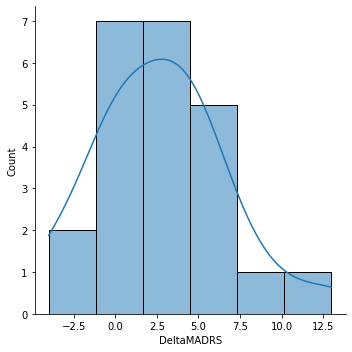

In [23]:
sns.displot(df['DeltaMADRS'],bins=6,
           kde=True)

In [24]:
df_condition_mads=df_condition.groupby('number')['madrs1','madrs2'].sum().reset_index()
df_condition_mads.head()

c:\users\rissu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


number  madrs1  madrs2
0   condition_1    19.0    19.0
1  condition_10    28.0    21.0
2  condition_11    24.0    24.0
3  condition_12    25.0    21.0
4  condition_13    18.0    13.0

In [25]:
fig=go.Figure()
fig.add_trace(go.Bar(
                    x=df_condition_mads['number'],
                    y=df_condition_mads['madrs1'],
    text=df_condition_mads['madrs1'],
    name='madrs1',
    textposition='inside'
))
fig.add_trace(go.Bar(
                    x=df_condition_mads['number'],
                    y=df_condition_mads['madrs2'],
    name='madrs2',
    text=df_condition_mads['madrs2'],
    textposition='inside'
))

fig.update_layout(title='Madrs Development',title_x=.5)


fig.show()

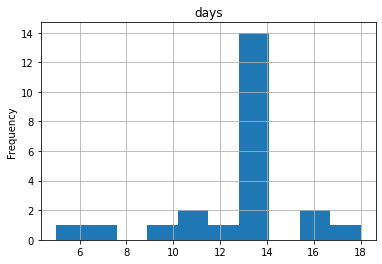

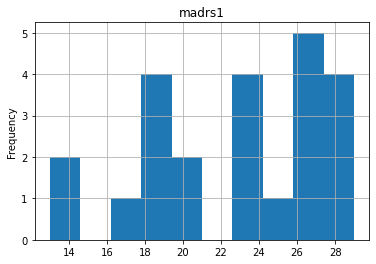

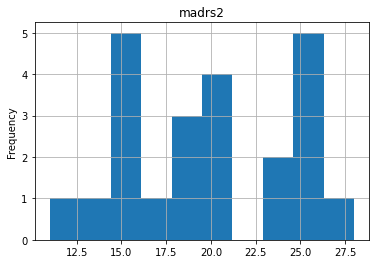

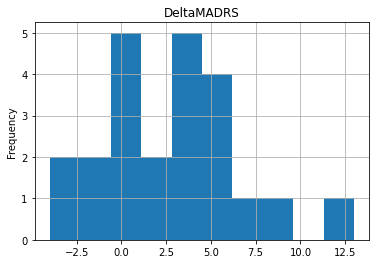

In [26]:
for f in features_num:
    df_condition[f].plot(kind='hist')
    pl.title(f)
    pl.grid()
    pl.show()

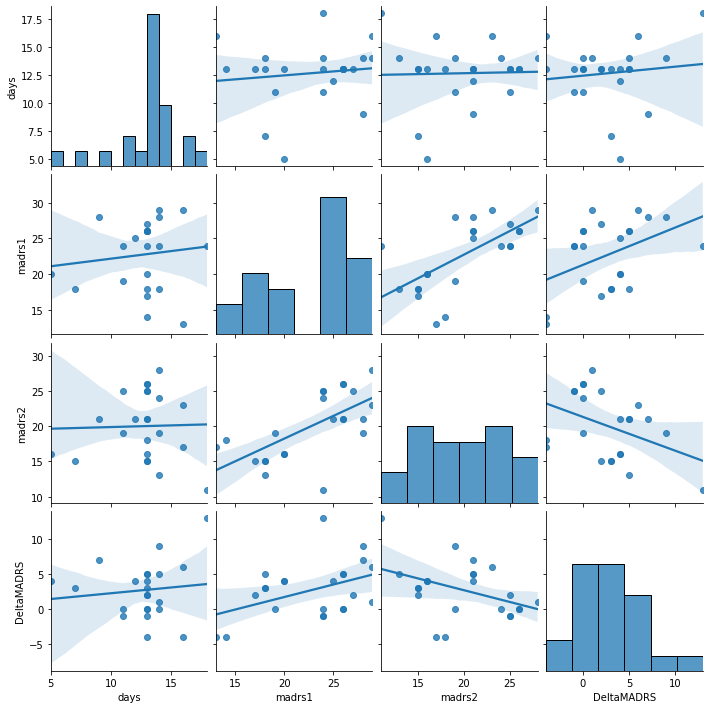

In [27]:
sns.pairplot(df_condition[features_num], kind='reg')
pl.show()

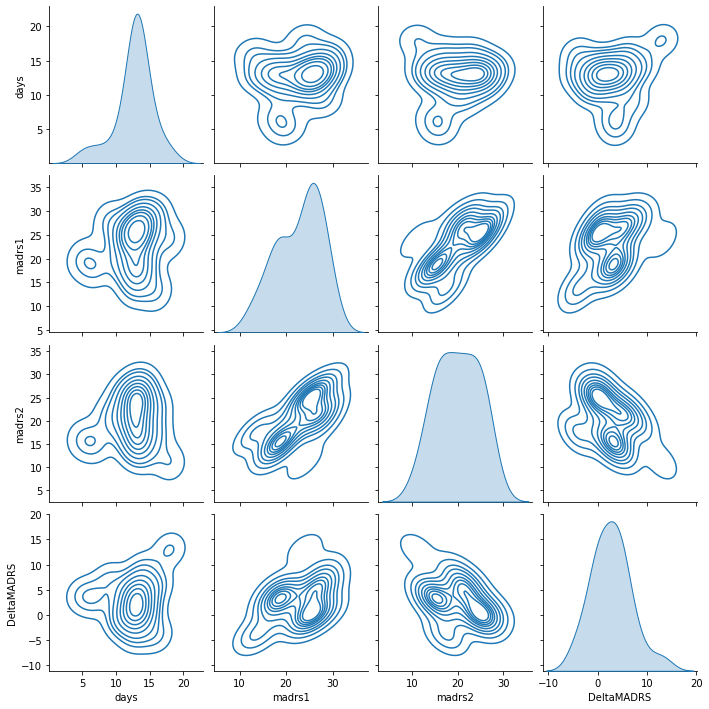

In [28]:
sns.pairplot(df_condition[features_num], kind='kde')
pl.show()

In [29]:
df_condition[features_num].corr(method='pearson')


days    madrs1    madrs2  DeltaMADRS
days        1.000000  0.122678  0.027726    0.115285
madrs1      0.122678  1.000000  0.653090    0.430772
madrs2      0.027726  0.653090  1.000000   -0.402082
DeltaMADRS  0.115285  0.430772 -0.402082    1.000000

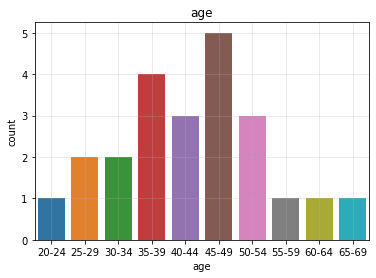

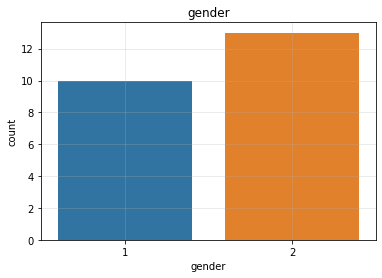

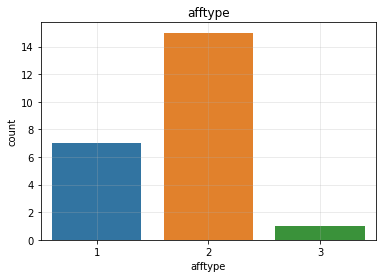

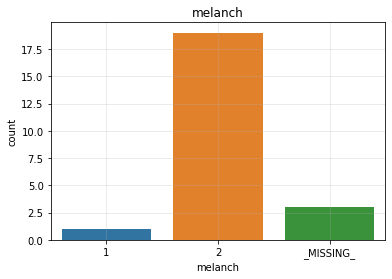

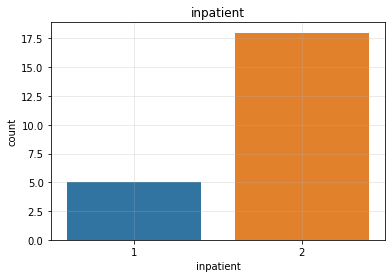

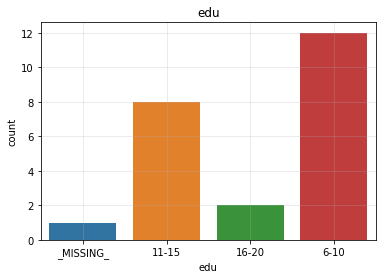

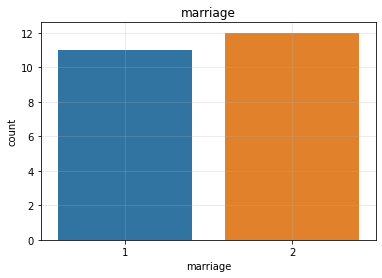

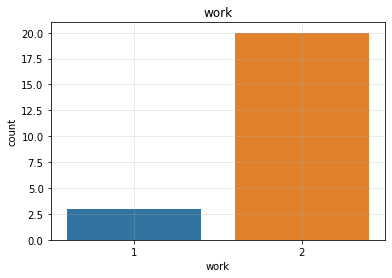

In [30]:
for f in features_cat:
    sns.countplot(x=df_condition[f])
    pl.title(f)
    pl.grid(alpha=.3)
    pl.show()

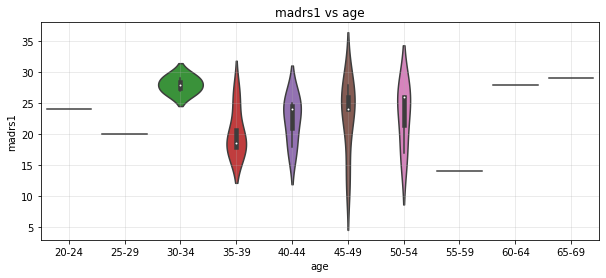

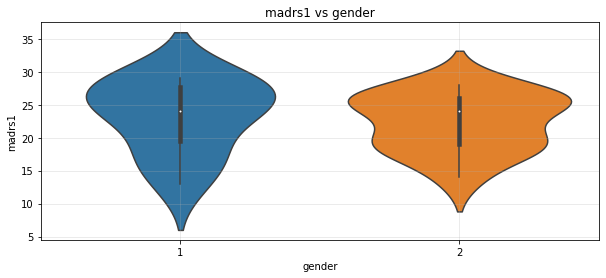

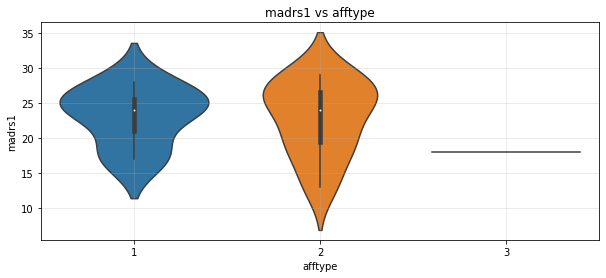

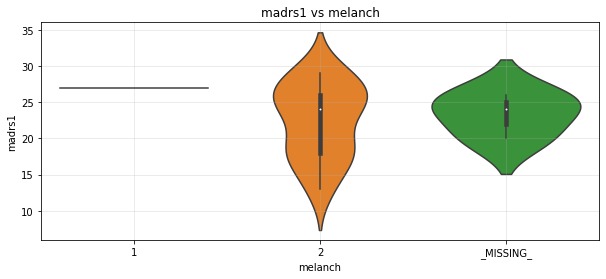

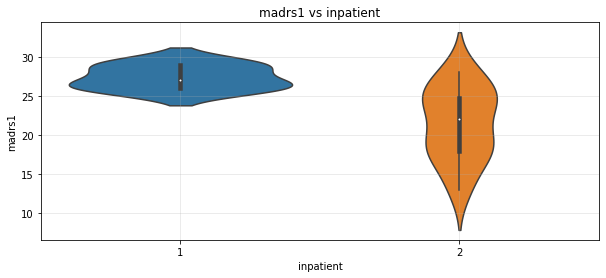

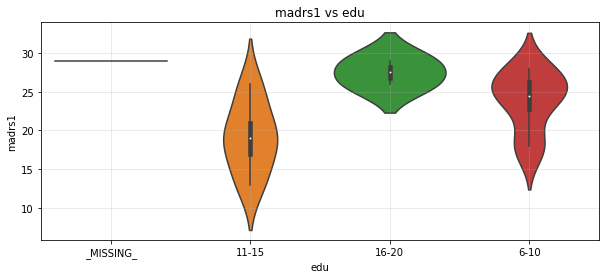

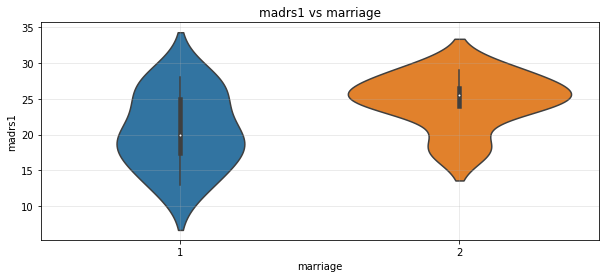

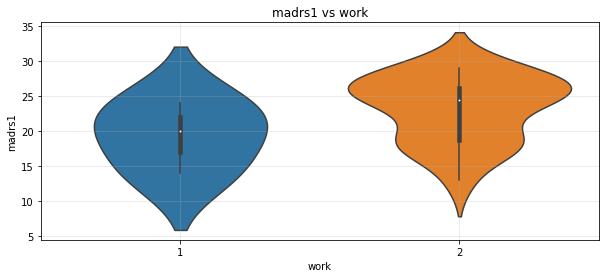

In [31]:
for f in features_cat:
    pl.figure(figsize=(10,4))
    sns.violinplot(data=df_condition,x=f,y='madrs1')
    pl.title('madrs1 vs '+f)
    pl.grid(alpha=.3)
    pl.show()

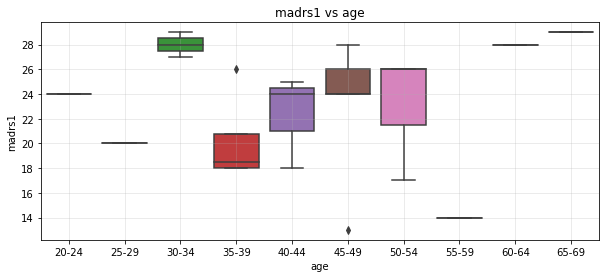

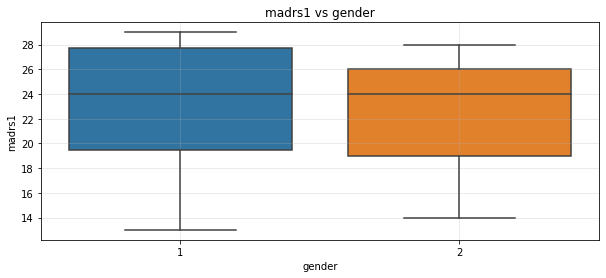

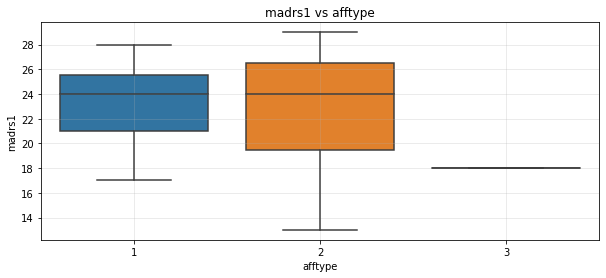

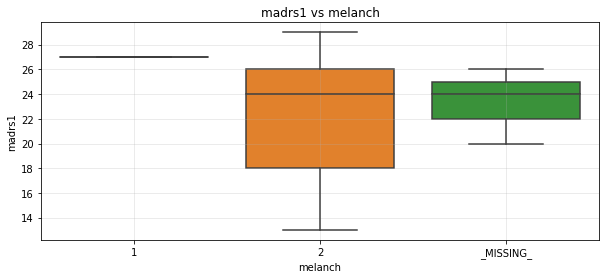

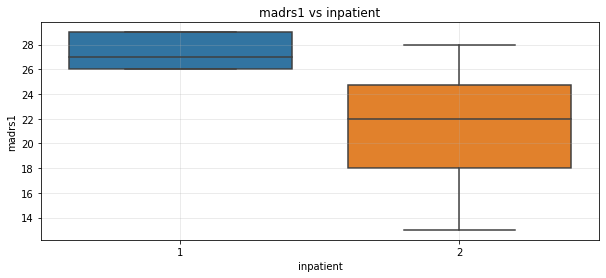

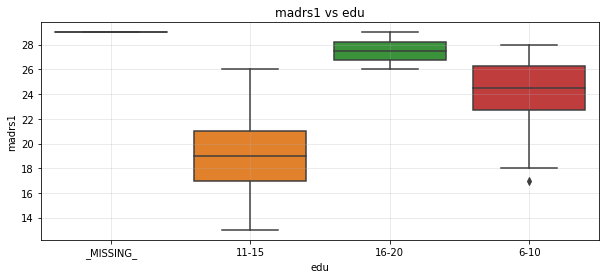

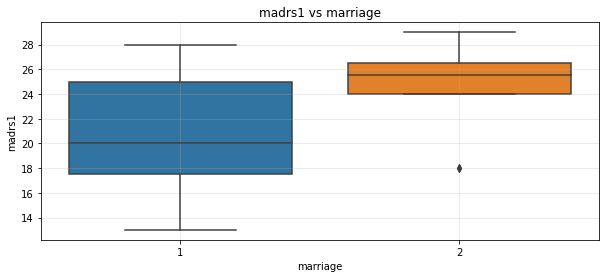

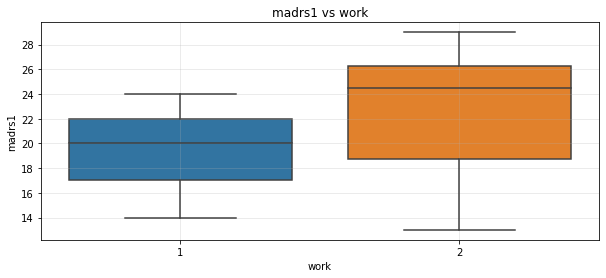

In [32]:
for f in features_cat:
    pl.figure(figsize=(10,4))
    sns.boxplot(data=df_condition,x=f,y='madrs1')
    pl.title('madrs1 vs '+f)
    pl.grid(alpha=.3)
    pl.show()

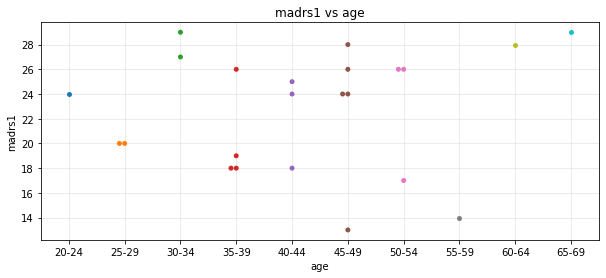

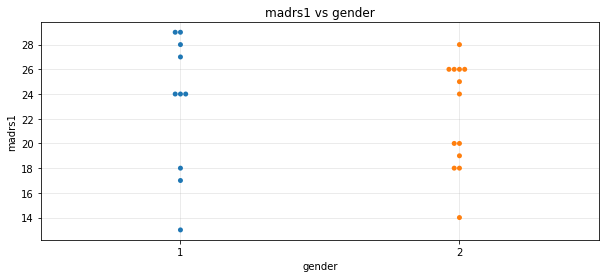

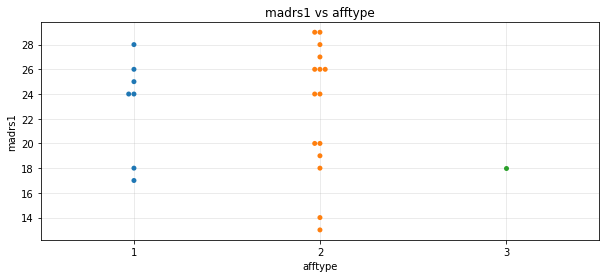

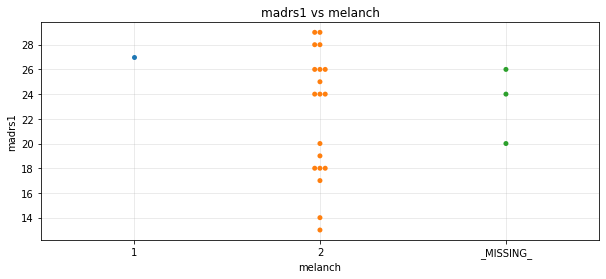

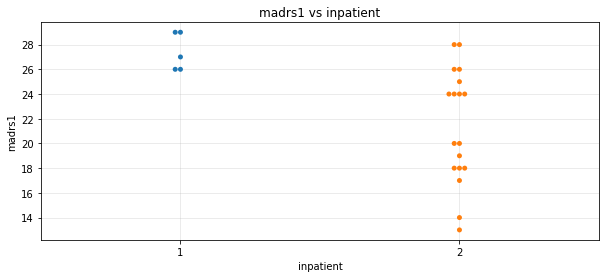

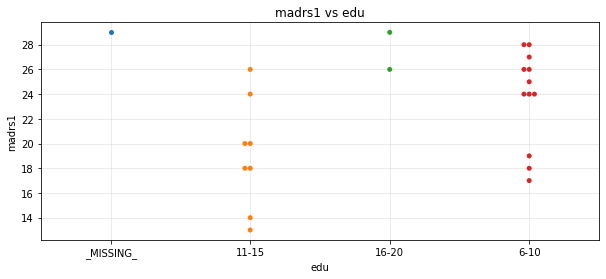

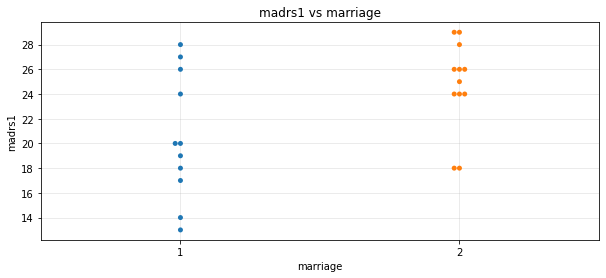

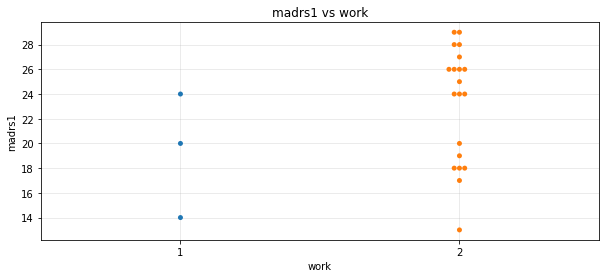

In [33]:
for f in features_cat:
    pl.figure(figsize=(10,4))
    sns.swarmplot(data=df_condition,x=f,y='madrs1')
    pl.title('madrs1 vs '+f)
    pl.grid(alpha=.3)
    pl.show()

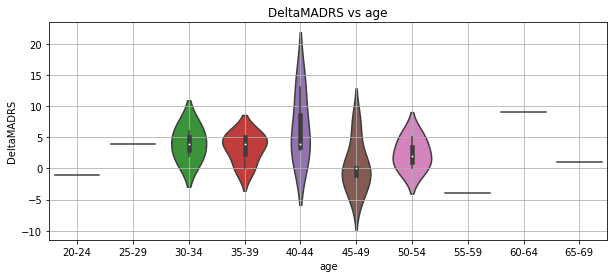

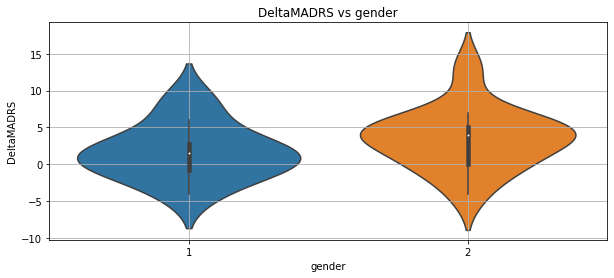

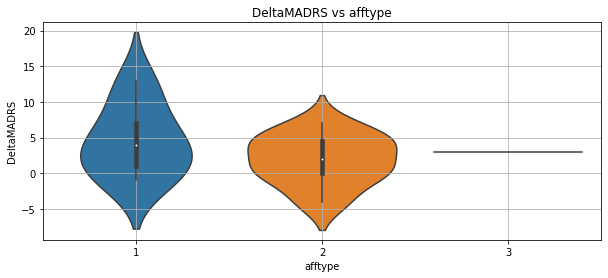

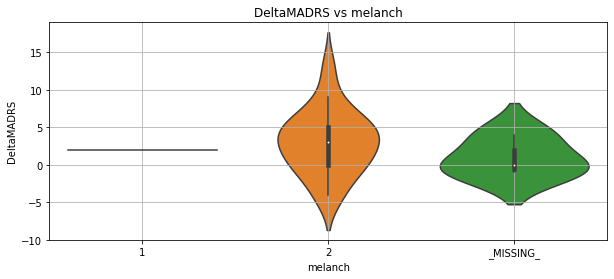

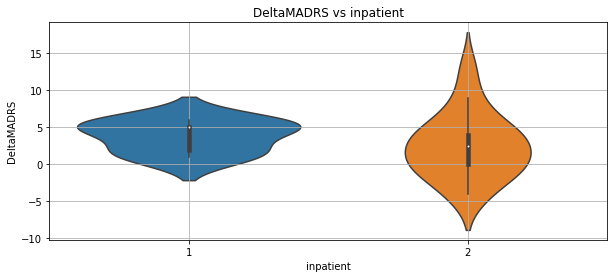

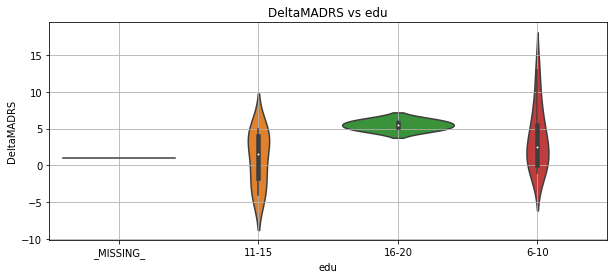

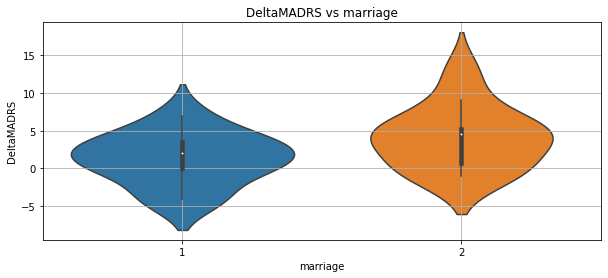

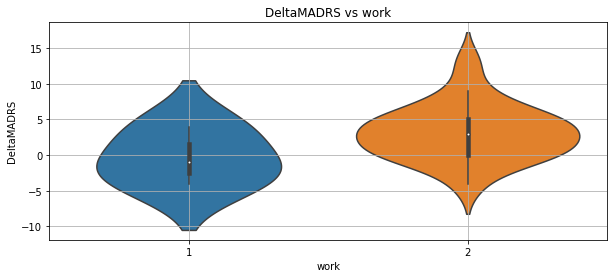

In [34]:
for f in features_cat:
    pl.figure(figsize=(10,4))
    sns.violinplot(data=df_condition, x=f, y='DeltaMADRS')
    pl.title('DeltaMADRS vs ' + f)
    pl.grid()
    pl.show()

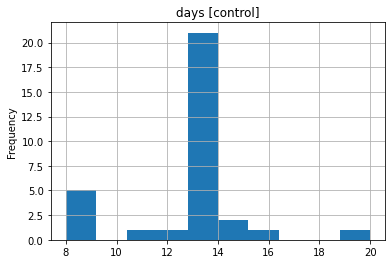

In [35]:
df_control.days.plot(kind='hist')
pl.title('days [control]')
pl.grid()
pl.show()

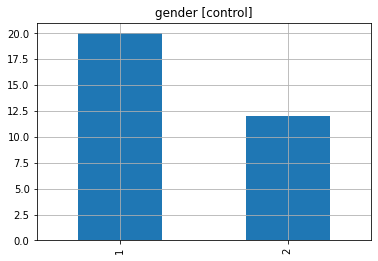

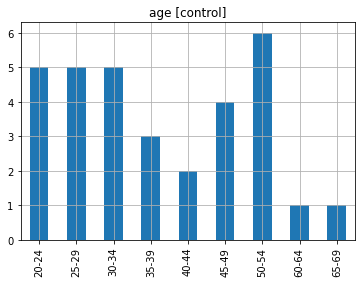

In [36]:
df_control.age = df_control.age.astype('category')
df_control.gender = df_control.gender.astype('category')
df_control.gender.value_counts().sort_index().plot(kind='bar')
pl.title('gender [control]')
pl.grid()
pl.show()

df_control.age.value_counts().sort_index().plot(kind='bar')
pl.title('age [control]')
pl.grid()
pl.show()

In [37]:
df_act=pd.read_csv('./condition/condition_1.csv')
df_act.head()

timestamp        date  activity
0  2003-05-07 12:00:00  2003-05-07         0
1  2003-05-07 12:01:00  2003-05-07       143
2  2003-05-07 12:02:00  2003-05-07         0
3  2003-05-07 12:03:00  2003-05-07        20
4  2003-05-07 12:04:00  2003-05-07       166

In [38]:
df_act.shape

(23244, 3)

In [39]:
df_act.activity.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    23244.000000
mean       146.948030
std        294.592424
min          0.000000
1%           0.000000
10%          0.000000
25%          0.000000
50%          9.000000
75%        172.000000
90%        469.000000
99%       1300.000000
max       3526.000000
Name: activity, dtype: float64

In [40]:
df_act['log1_act']=np.log10(1+df_act.activity)
df_act['non_zero']=(df_act.activity>0).astype(int)

c:\users\rissu\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='activity', ylabel='Density'>

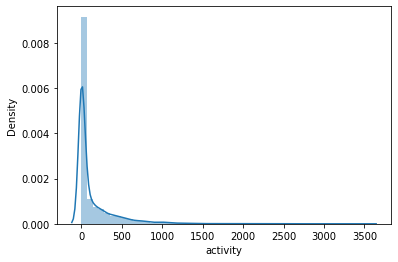

In [41]:
sns.distplot(df_act.activity)

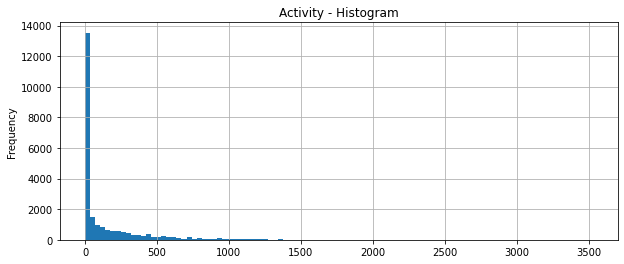

In [42]:
# distribution of activity
pl.figure(figsize=(10,4))
df_act.activity.plot(kind='hist', bins=100)
pl.title('Activity - Histogram')
pl.grid()
pl.show()

c:\users\rissu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

divide by zero encountered in log

c:\users\rissu\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='activity', ylabel='Density'>

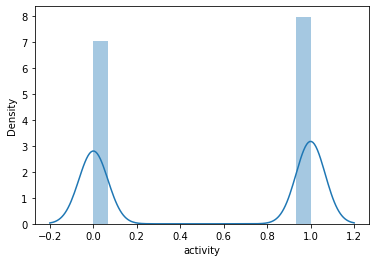

In [43]:
sns.distplot(np.log(df_act.activity)>=0)

c:\users\rissu\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='log1_act', ylabel='Density'>

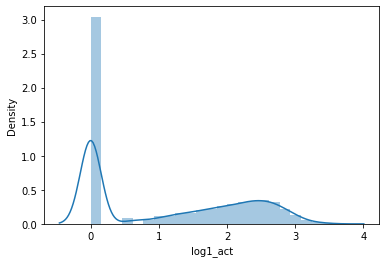

In [44]:
sns.distplot(df_act.log1_act)

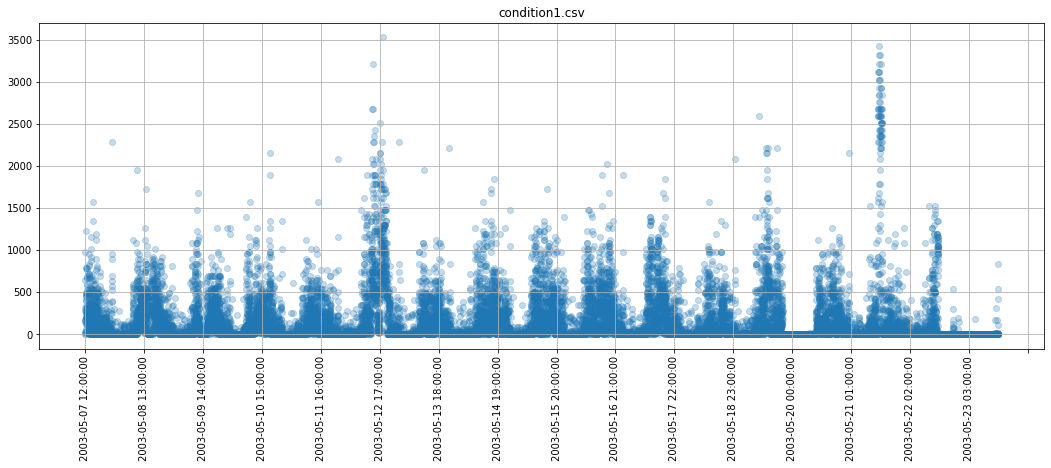

In [45]:
my_alpha=0.25
fig,ax=pl.subplots(figsize=(18,6))
ax.scatter(df_act.timestamp,df_act.activity,alpha=my_alpha)
ax.xaxis.set_major_locator(pl.MaxNLocator(20))
pl.title('condition1.csv')
pl.xticks(rotation=90)
pl.grid()
pl.show()

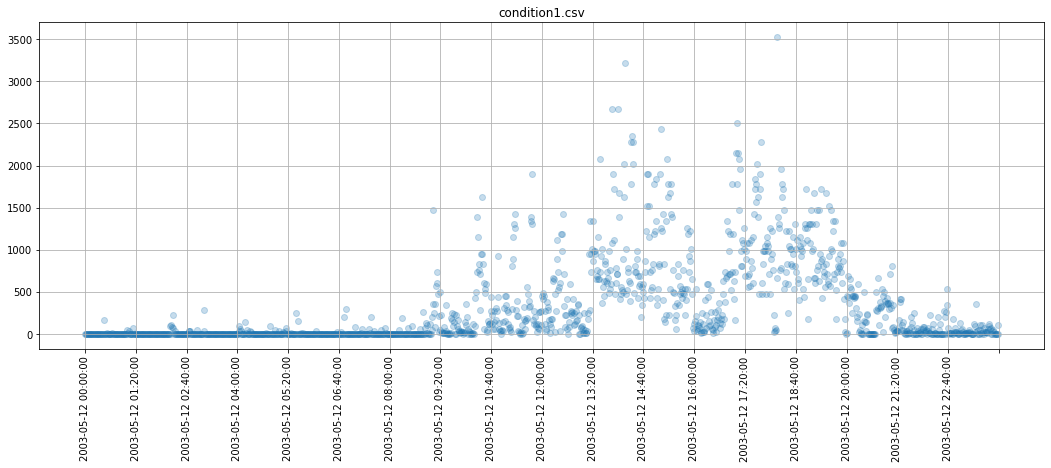

In [46]:
df_act_zoom = df_act[df_act.date=='2003-05-12']
my_alpha=0.25
fig, ax = pl.subplots(figsize=(18,6))
ax.scatter(df_act_zoom.timestamp, df_act_zoom.activity, alpha=my_alpha)
ax.xaxis.set_major_locator(pl.MaxNLocator(20)) # reduce number of x-axis labels
pl.title('condition1.csv')
pl.xticks(rotation=90)
pl.grid()
pl.show()

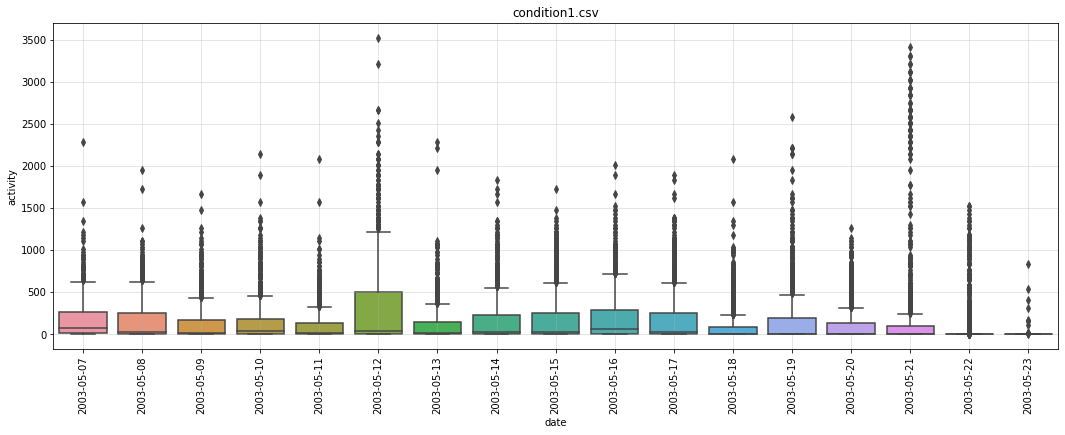

In [47]:
pl.subplots(figsize=(18,6))
sns.boxplot(data=df_act,x='date',y='activity')
pl.xticks(rotation=90)
pl.title('condition1.csv')
pl.grid(alpha=.4)
pl.show()

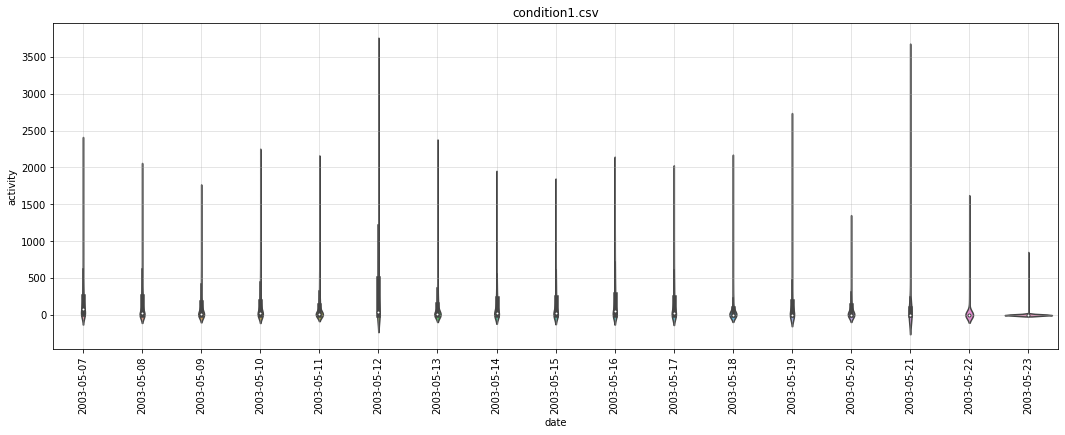

In [48]:
pl.subplots(figsize=(18,6))
sns.violinplot(data=df_act,x='date',y='activity')
pl.xticks(rotation=90)
pl.title('condition1.csv')
pl.grid(alpha=.4)
pl.show()

In [49]:
df_act_by_date=df_act.groupby(['date'],as_index=False).agg(
    n=pd.NamedAgg(column='activity',aggfunc='count'),
    n_non_zero=pd.NamedAgg(column='non_zero',aggfunc='sum'),
    mean_act=pd.NamedAgg(column='activity',aggfunc='mean'),
    q75_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=75)),
    q90_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=90)),
    q95_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=95)),
    q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
    max_act = pd.NamedAgg(column='activity', aggfunc='max'))


df_act_by_date

date     n  n_non_zero    mean_act  q75_act  q90_act  q95_act  \
0   2003-05-07   720         573  174.144444   259.00    485.0    667.0   
1   2003-05-08  1440         851  156.247222   252.25    485.0    626.0   
2   2003-05-09  1440         775  124.135417   172.00    398.0    587.0   
3   2003-05-10  1440         901  134.961806   184.00    411.0    587.0   
4   2003-05-11  1440         835   99.439583   134.00    328.0    469.0   
5   2003-05-12  1440         873  316.874306   500.00   1010.0   1384.0   
6   2003-05-13  1440         770  108.475694   148.00    361.0    469.0   
7   2003-05-14  1440         869  155.684722   227.00    469.0    667.0   
8   2003-05-15  1440         864  170.877083   250.00    533.0    759.0   
9   2003-05-16  1440         948  190.508333   288.50    568.0    759.0   
10  2003-05-17  1440         853  177.760417   250.00    587.0    835.0   
11  2003-05-18  1440         701   97.729167    91.00    350.2    533.0   
12  2003-05-19  1440         699  168.102778   191.75    569.9    835.0   
13  2003-05-20  1440         730  111.488194   130.00    398.0    550.0   
14  2003-05-21  1440         747  199.597222    98.00    439.0   1260.0   
15  2003-05-22  1440         338   71.112500     0.00    172.0    517.8   
16  2003-05-23   924          15    2.991342     0.00      0.0      0.0   

    q99_act  max_act  
0   1003.92     2284  
1    890.00     1954  
2    948.00     1672  
3   1097.35     2146  
4    759.00     2080  
5   2055.04     3526  
6    879.08     2284  
7   1182.00     1836  
8   1146.00     1725  
9   1167.96     2016  
10  1205.79     1894  
11   966.30     2080  
12  1474.00     2586  
13   948.00     1260  
14  2839.00     3418  
15  1167.96     1521  
16    14.77      835

In [50]:
# df_act_by_date=df_act.groupby(['date'],as_index=False).agg({
#     'activity':'count'})

# df_act_by_date

In [51]:
df_act_by_date = df_act_by_date[df_act_by_date.n==1440] # 1440 = 24*60 minutes in a day
df_act_by_date

date     n  n_non_zero    mean_act  q75_act  q90_act  q95_act  \
1   2003-05-08  1440         851  156.247222   252.25    485.0    626.0   
2   2003-05-09  1440         775  124.135417   172.00    398.0    587.0   
3   2003-05-10  1440         901  134.961806   184.00    411.0    587.0   
4   2003-05-11  1440         835   99.439583   134.00    328.0    469.0   
5   2003-05-12  1440         873  316.874306   500.00   1010.0   1384.0   
6   2003-05-13  1440         770  108.475694   148.00    361.0    469.0   
7   2003-05-14  1440         869  155.684722   227.00    469.0    667.0   
8   2003-05-15  1440         864  170.877083   250.00    533.0    759.0   
9   2003-05-16  1440         948  190.508333   288.50    568.0    759.0   
10  2003-05-17  1440         853  177.760417   250.00    587.0    835.0   
11  2003-05-18  1440         701   97.729167    91.00    350.2    533.0   
12  2003-05-19  1440         699  168.102778   191.75    569.9    835.0   
13  2003-05-20  1440         730  111.488194   130.00    398.0    550.0   
14  2003-05-21  1440         747  199.597222    98.00    439.0   1260.0   
15  2003-05-22  1440         338   71.112500     0.00    172.0    517.8   

    q99_act  max_act  
1    890.00     1954  
2    948.00     1672  
3   1097.35     2146  
4    759.00     2080  
5   2055.04     3526  
6    879.08     2284  
7   1182.00     1836  
8   1146.00     1725  
9   1167.96     2016  
10  1205.79     1894  
11   966.30     2080  
12  1474.00     2586  
13   948.00     1260  
14  2839.00     3418  
15  1167.96     1521

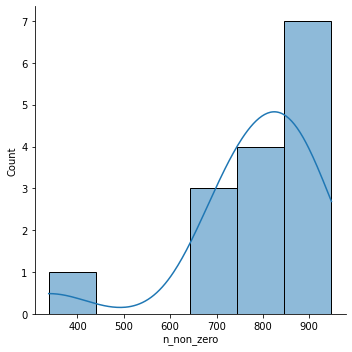

In [52]:
sns.displot(df_act_by_date['n_non_zero'],kde=True)

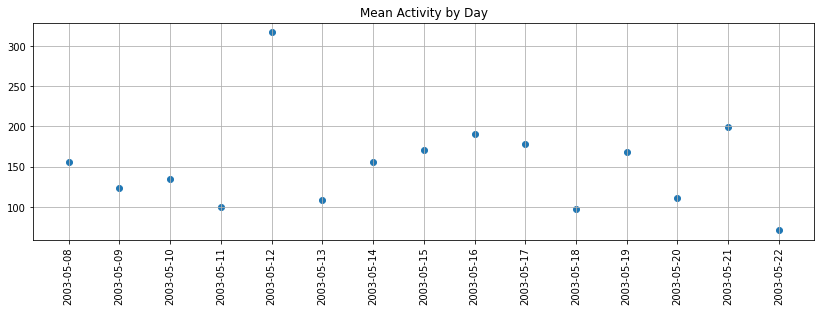

Mean of daily means: 152.2
Stdev of daily means: 59.22


In [53]:
pl.figure(figsize=(14,4))
pl.scatter(df_act_by_date.date, df_act_by_date.mean_act)
pl.title('Mean Activity by Day')
pl.xticks(rotation=90)
pl.grid()
pl.show()

print('Mean of daily means:', np.round(df_act_by_date.mean_act.mean(),2))
print('Stdev of daily means:', np.round(df_act_by_date.mean_act.std(),2))

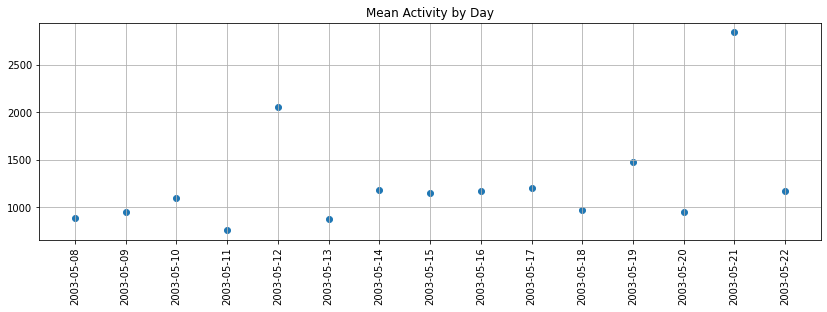

Mean of daily means: 1248.37
Stdev of daily means: 537.75


In [54]:
pl.figure(figsize=(14,4))
pl.scatter(df_act_by_date.date, df_act_by_date.q99_act)
pl.title('Mean Activity by Day')
pl.xticks(rotation=90)
pl.grid()
pl.show()

print('Mean of daily means:', np.round(df_act_by_date.q99_act.mean(),2))
print('Stdev of daily means:', np.round(df_act_by_date.q99_act.std(),2))

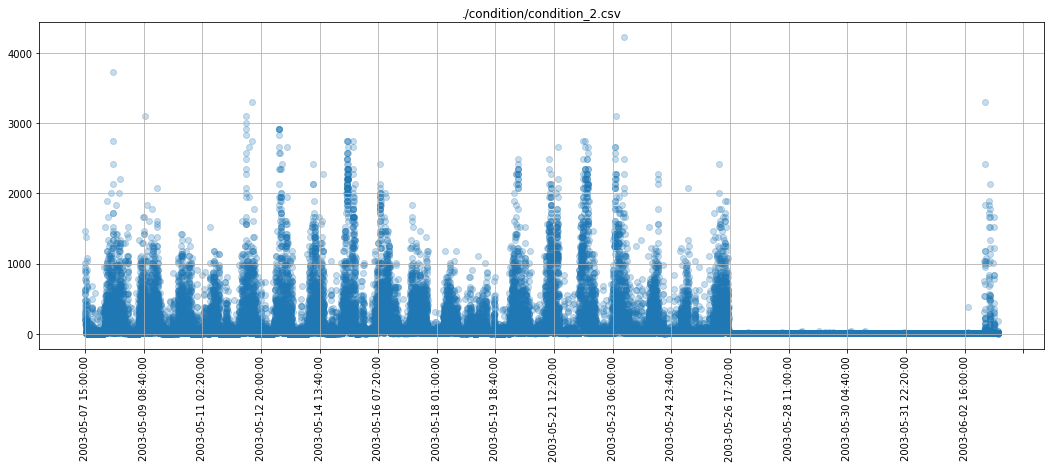

In [73]:
my_file ='./condition/condition_2.csv'
df_temp = pd.read_csv(my_file)

my_alpha=0.25
fig, ax = pl.subplots(figsize=(18,6))
ax.scatter(df_temp.timestamp, df_temp.activity , alpha=my_alpha)
ax.xaxis.set_major_locator(pl.MaxNLocator(20)) # reduce number of x-axis labels
pl.title(my_file)
pl.xticks(rotation=90)
pl.grid()
# ax.legend(loc='upper left')
pl.show()

In [68]:
daily_threshold = 10
mean_list = []
std_list = []
q99_list = []
std_q99_list = []

In [77]:
for i in range(23):
    j=i+1
    my_file='./condition/condition_'+str(j)+'.csv'
    print('Extracting from: ',my_file)
    df_temp=pd.read_csv(my_file)
    df_temp_by_date = df_temp.groupby(['date'], as_index=False).agg(
        n = pd.NamedAgg(column='activity', aggfunc='count'),
        mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
        q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
        max_act = pd.NamedAgg(column='activity', aggfunc='max')
    )
    df_temp_by_date = df_temp_by_date[df_temp_by_date.n==1440]
    # remove days with unreasonable low average daily activity
    df_temp_by_date = df_temp_by_date[df_temp_by_date.mean_act > daily_threshold]
    print(df_temp_by_date.head(3))
    mean_temp = df_temp_by_date.mean_act.mean() # mean of mean daily activity
    std_temp = df_temp_by_date.mean_act.std() # stdev of mean daily activity
    mean_q99_temp = df_temp_by_date.q99_act.mean() # mean of 99th percentiles of daily activity
    std_q99_temp = df_temp_by_date.q99_act.std() # stdev of 99th percentiles of daily activity
    
    # add results to lists
    mean_list.append(mean_temp)
    std_list.append(std_temp)
    q99_list.append(mean_q99_temp)
    std_q99_list.append(std_q99_temp)

Extracting from:  ./condition/condition_1.csv
         date     n    mean_act  q99_act  max_act
1  2003-05-08  1440  156.247222   890.00     1954
2  2003-05-09  1440  124.135417   948.00     1672
3  2003-05-10  1440  134.961806  1097.35     2146
Extracting from:  ./condition/condition_2.csv
         date     n    mean_act  q99_act  max_act
1  2003-05-08  1440  259.645139  1496.67     3736
2  2003-05-09  1440  244.096528  1362.23     3103
3  2003-05-10  1440  155.424306  1106.00     1423
Extracting from:  ./condition/condition_3.csv
         date     n    mean_act  q99_act  max_act
1  2003-05-20  1440  276.413889  1638.72     2269
2  2003-05-21  1440  193.988194  1290.00     2066
3  2003-05-22  1440  221.613889  1671.05     3002
Extracting from:  ./condition/condition_4.csv
         date     n    mean_act  q99_act  max_act
1  2003-06-04  1440  248.211806  1381.23     2370
2  2003-06-05  1440  141.854861   977.91     1535
3  2003-06-06  1440  144.496528  1234.00     1738
Extracting from: